In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape


((800, 2), (200, 2))

In [2]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

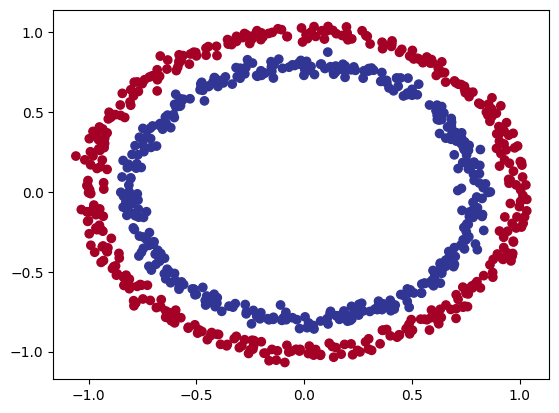

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

In [4]:
tf.random.set_seed(42)

#Create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

#Fit
history = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 6ms/step - loss: 0.6974 - accuracy: 0.4750
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.4988
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5200
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.5450
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.5700
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6421 - accuracy: 0.6438
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6156 - accuracy: 0.7225
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.7650
Epoch 9/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5336 - accuracy: 0.8375
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.8913
Epoch 11/25
25/25 [

In [5]:
#Evaluation

loss, accuracy = model_1.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 1s 7ms/step - loss: 0.0360 - accuracy: 1.0000
Model loss on the test set: 0.0360255129635334
Model accuracy on the test set: 100.00%


313/313 [==============================] - 2s 7ms/step
doing binary classifcation...
313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


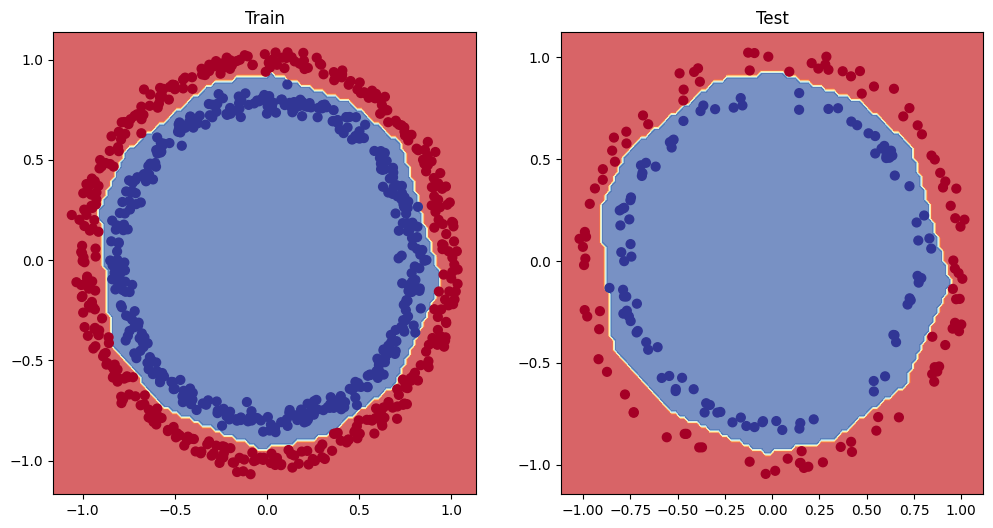

In [6]:
#Plot results

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()

In [10]:
#Plot loss curve

pd.DataFrame(history.history)

,loss,accuracy
0,0.697382,0.47500
1,0.690122,0.49875
2,0.684079,0.52000
3,0.676352,0.54500
4,0.664041,0.57000
5,0.642138,0.64375
6,0.615617,0.72250
7,0.585080,0.76500
8,0.533615,0.83750
9,0.477077,0.89125


Text(0.5, 1.0, 'Model Training Curve')

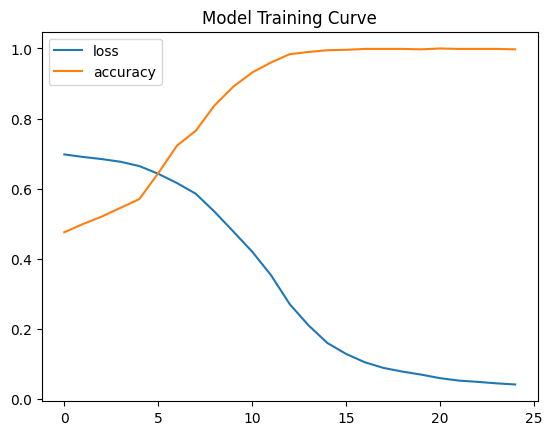

In [14]:
pd.DataFrame(history.history).plot()
plt.title("Model Training Curve")

# Testing the model callback

In [17]:
tf.random.set_seed(42)

#Create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#Create a lr stamp callback
lr_stamp = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_stamp])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7246 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

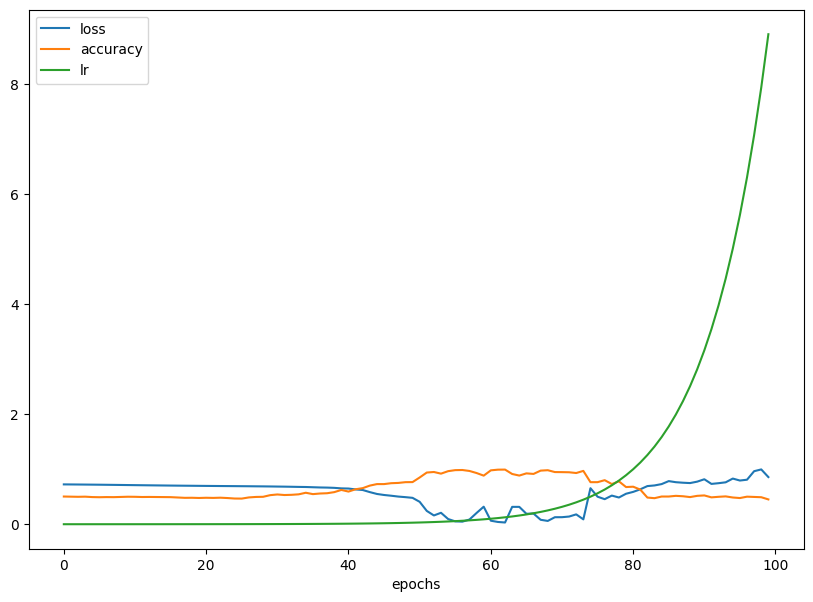

In [19]:
pd.DataFrame(history_2.history).plot(figsize=(10,7), xlabel="epochs")

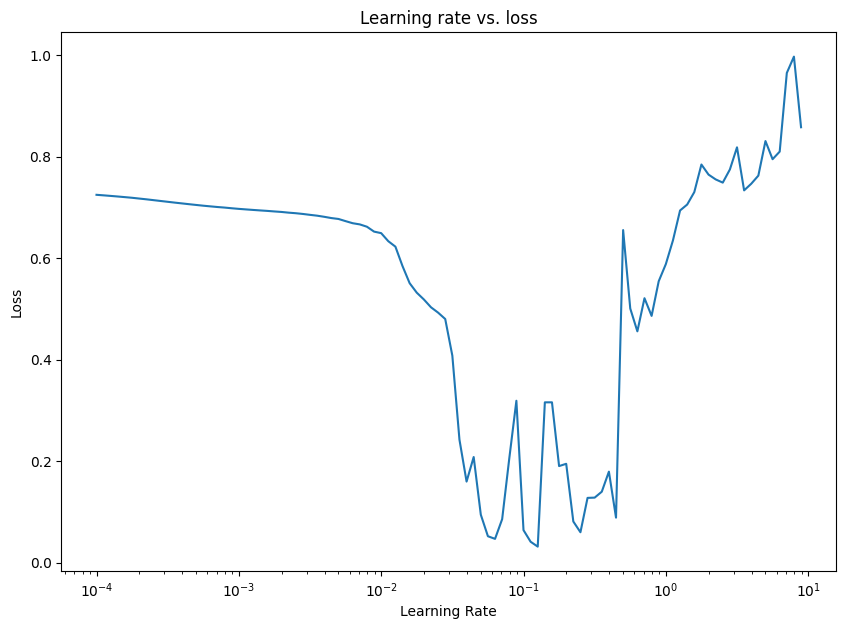

In [20]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

#Finding out the ideal value of the learning rate

the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve)

its between 0.05

In [36]:
tf.random.set_seed(42)

# Create
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.06),
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_3 = model_3.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5138
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.6650
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7063
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8037
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.9475
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.1592 - accuracy: 0.9650
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0838 - accuracy: 0.9900
Epoch 8/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0712 - accuracy: 0.9887
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0464 - accuracy: 0.9925
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9862


In [37]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.0363 - accuracy: 1.0000


[0.03634781017899513, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


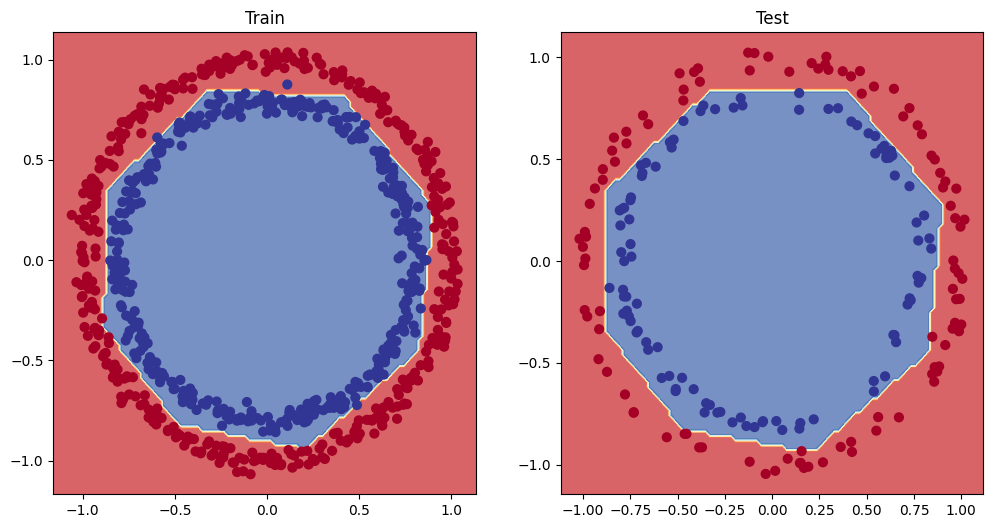

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X=X_test, y=y_test)
plt.show()

Evaluating accuracy

In [39]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 1.0000
Model loss on test set: 0.03634781017899513
Model accuracy on test set: 100.00%


In [42]:
#Confusion Matrix

y_preds = model_3.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))


7/7 [==============================] - 0s 4ms/step


array([[101,   0],
       [  0,  99]])

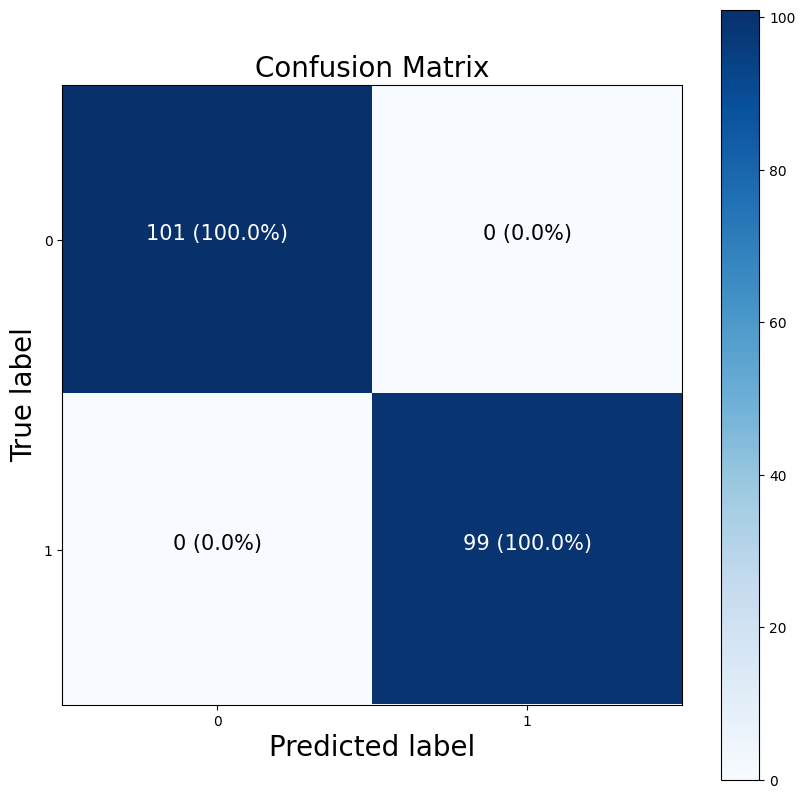

In [44]:
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)